In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, PowerTransformer, StandardScaler
# from sklearn import svm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.metrics import r2_score, max_error

In [2]:
df = pd.read_csv('reg_cancer_deathrate.csv')

# I will construct this model following the instructions presented in "Second Problem - Regression Analysis"

# Data Processing

## a) EDA

In [3]:
df

DeathRate  Perc_OnlyPrivate  Perc_Private  Perc_Poverty  \
0         140.0              56.7          78.8          10.2   
1         191.5              49.8          64.4          16.9   
2         203.3              60.4          69.1           9.9   
3         146.2              66.5          84.2          14.2   
4         192.8              51.4          66.5          13.9   
...         ...               ...           ...           ...   
3042      209.5              43.9          64.8          13.4   
3043      187.1              60.0          72.7          11.0   
3044      126.4               NaN          58.2          10.2   
3045      160.1              39.5          54.7          20.6   
3046      169.8              63.1          76.5           7.7   

      Perc_MarriedHouse    Avg_Cases  Mean_Male  Mean_Female  BirthRate  \
0             60.824742    17.000000       46.1         49.8   4.047619   
1             46.527144  1551.000000       38.1         40.3   5.573941   
2             42.882250     8.000000       38.8         32.9   4.391052   
3             53.925845  1962.667684       31.4         33.9   6.221294   
4             44.244120   187.000000       39.8         41.3   6.150456   
...                 ...          ...        ...          ...        ...   
3042          53.255847   116.000000       49.1         49.4   5.452639   
3043          58.086588   209.000000       37.9         39.6   4.025192   
3044          58.665503   183.000000       35.8         36.1   4.502177   
3045          49.822921    94.000000       38.5         43.6   3.467782   
3046          58.405127   570.000000       35.0         36.4   5.364323   

      Perc_Married  Perc_Unemployed16  Perc_HighSchool25  \
0             66.7                1.2               35.1   
1             48.2               11.5               33.3   
2             40.6                2.1               37.0   
3             51.3                3.1               27.2   
4             47.6                7.0               33.2   
...            ...                ...                ...   
3042          59.3                6.6               38.8   
3043          55.9                7.3               34.1   
3044          57.8                6.9               26.1   
3045          47.5                9.0               39.2   
3046          55.1                4.5               29.3   

      Perc_HighSchool18_24  Perc_Col18_24  Perc_Bach25  Perc_Emp16  \
0                     38.4            NaN         18.1        64.7   
1                     34.6           38.8         14.0        57.4   
2                     52.1            NaN         10.3        80.1   
3                     22.9            NaN         20.1        63.6   
4                     26.9           54.7         15.4        59.9   
...                    ...            ...          ...         ...   
3042                  51.1            NaN         14.1        52.9   
3043                  49.6           32.1         14.9        59.0   
3044                  33.1            NaN         19.6        66.5   
3045                  39.4           30.8          8.8        50.6   
3046                  34.0           45.1         18.6        65.6   

      Avg_DeathPerYear  Mean_Income  IncidenceRate  
0                    6        45710     405.200000  
1                  658        47708     466.600000  
2                    3        68387     201.300000  
3                   20        55292     453.549422  
4                  104        46475     354.700000  
...                ...          ...            ...  
3042                55        42079     472.200000  
3043                90        62394     421.600000  
3044                58        62529     379.600000  
3045                40        42286     383.000000  
3046               189        68421     499.800000  

[3047 rows x 19 columns]

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeathRate             3047 non-null   float64
 1   Perc_OnlyPrivate      2444 non-null   float64
 2   Perc_Private          3047 non-null   float64
 3   Perc_Poverty          3047 non-null   float64
 4   Perc_MarriedHouse     3047 non-null   float64
 5   Avg_Cases             3047 non-null   float64
 6   Mean_Male             3047 non-null   float64
 7   Mean_Female           3047 non-null   float64
 8   BirthRate             3047 non-null   float64
 9   Perc_Married          3047 non-null   float64
 10  Perc_Unemployed16     3047 non-null   float64
 11  Perc_HighSchool25     3047 non-null   float64
 12  Perc_HighSchool18_24  3047 non-null   float64
 13  Perc_Col18_24         762 non-null    float64
 14  Perc_Bach25           3047 non-null   float64
 15  Perc_Emp16           

DeathRate  Perc_OnlyPrivate  Perc_Private  Perc_Poverty  \
count  3047.000000       2444.000000   3047.000000   3047.000000   
mean    170.963177         42.453846     64.354939     16.878175   
std      99.068437         79.704247     10.647057      6.409087   
min    -999.000000       -999.000000     22.300000      3.200000   
25%     160.850000         40.900000     57.200000     12.150000   
50%     177.900000         48.600000     65.100000     15.900000   
75%     195.200000         55.600000     72.100000     20.400000   
max     362.800000         78.900000     92.300000     47.400000   

       Perc_MarriedHouse     Avg_Cases    Mean_Male  Mean_Female    BirthRate  \
count        3047.000000   3047.000000  3047.000000  3047.000000  3047.000000   
mean           51.243872    606.338544    31.725271    42.145323     5.640306   
std             6.572814   1416.356223    90.056749     5.292849     1.985816   
min            22.992490      6.000000  -999.000000    22.300000     0.000000   
25%            47.763063     76.000000    36.200000    39.100000     4.521419   
50%            51.669941    171.000000    39.500000    42.400000     5.381478   
75%            55.395132    518.000000    42.500000    45.300000     6.493677   
max            78.075397  38150.000000    64.700000    65.700000    21.326165   

       Perc_Married  Perc_Unemployed16  Perc_HighSchool25  \
count   3047.000000        3047.000000        3047.000000   
mean      44.906170           7.852412          34.804660   
std       85.144007           3.452371           7.034924   
min     -999.000000           0.400000           7.500000   
25%       47.700000           5.500000          30.400000   
50%       52.400000           7.600000          35.300000   
75%       56.400000           9.700000          39.650000   
max       72.500000          29.400000          54.800000   

       Perc_HighSchool18_24  Perc_Col18_24  Perc_Bach25   Perc_Emp16  \
count           3047.000000     762.000000  3047.000000  2895.000000   
mean              35.002068      40.977034    13.282015    54.152642   
std                9.069722      11.115805     5.394756     8.315064   
min                0.000000       7.100000     2.500000    17.600000   
25%               29.200000      34.000000     9.400000    48.600000   
50%               34.700000      40.400000    12.300000    54.500000   
75%               40.700000      46.400000    16.100000    60.300000   
max               72.500000      79.000000    42.200000    80.100000   

       Avg_DeathPerYear    Mean_Income  IncidenceRate  
count       3047.000000    3047.000000    3047.000000  
mean         185.965868   46720.668855     448.268586  
std          504.134286   12687.958435      54.560733  
min            3.000000    -999.000000     201.300000  
25%           28.000000   38638.500000     420.300000  
50%           61.000000   45132.000000     453.549422  
75%          149.000000   52446.000000     480.850000  
max        14010.000000  125635.000000    1206.900000

In [5]:
df.isnull().sum()

DeathRate                  0
Perc_OnlyPrivate         603
Perc_Private               0
Perc_Poverty               0
Perc_MarriedHouse          0
Avg_Cases                  0
Mean_Male                  0
Mean_Female                0
BirthRate                  0
Perc_Married               0
Perc_Unemployed16          0
Perc_HighSchool25          0
Perc_HighSchool18_24       0
Perc_Col18_24           2285
Perc_Bach25                0
Perc_Emp16               152
Avg_DeathPerYear           0
Mean_Income                0
IncidenceRate              0
dtype: int64

In [6]:
a = 0
df_copy = df.copy()

for col in df.columns:
    qty = df[df[col]<0]
    df = df[(df[col]>=0) | (df[col].isnull())]
    # display(qty)
    a+=len(qty)
print('there were '+str(a)+' columns droped due to negative values')

df.drop(['Perc_Col18_24'], axis=1, inplace=True)
df['Perc_Emp16'] = df['Perc_Emp16'].fillna(df['Perc_Emp16'].mean())

there were 98 columns droped due to negative values


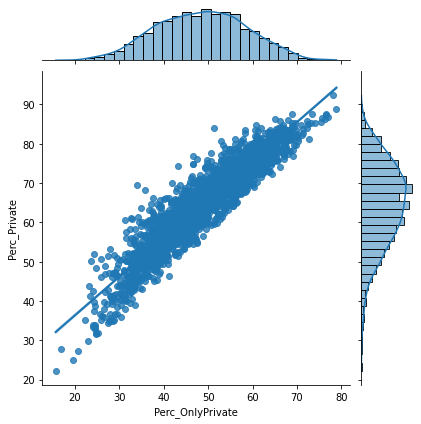

In [7]:
sns.jointplot(data=df, x='Perc_OnlyPrivate', y='Perc_Private', kind='reg')

In [8]:
df.drop(['Perc_OnlyPrivate'], axis=1, inplace=True)

- I have drop feature Perc_col18_24 because of the considerable ammount of missing values.
- I am considering that knowing the percentage of resident of the commune with private health is enough, and knowing if it is only private or not is not relevant to this specific scenario. So i have decide to drop the related column and get rid of the majority of left missing values. This desition is justified again because of the strong linear relationship between them

There are still 150 missing values from feature Perc_Emp16. Since i have already remove 98 data rows i replace them with the mean value instead of remove the rows. Doing this could lead to low accuracy but i will give it a try

## b) Joint behavior analysis

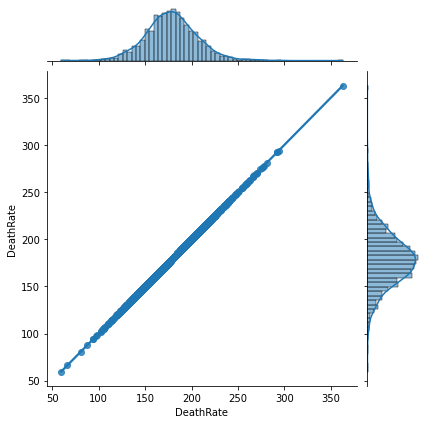

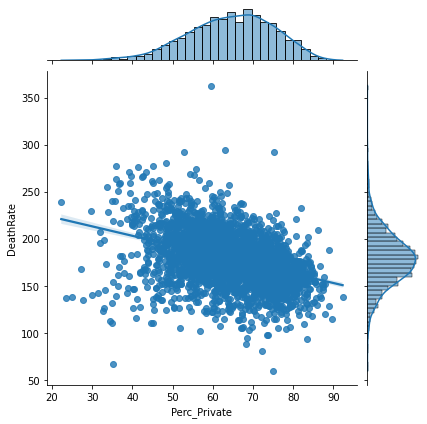

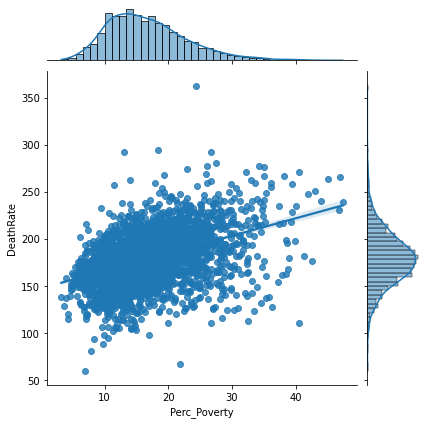

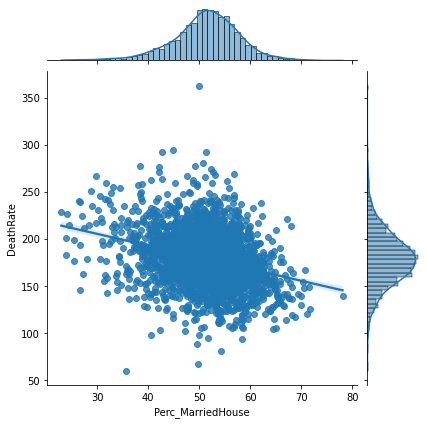

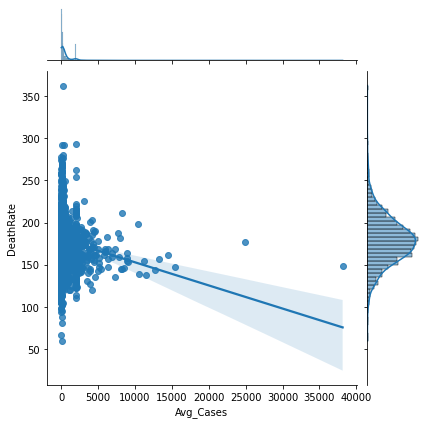

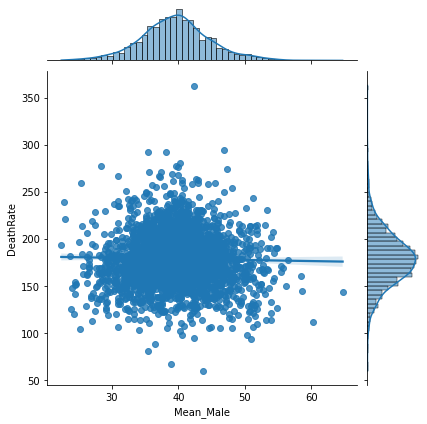

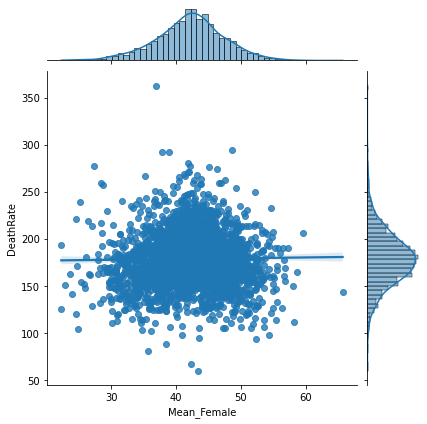

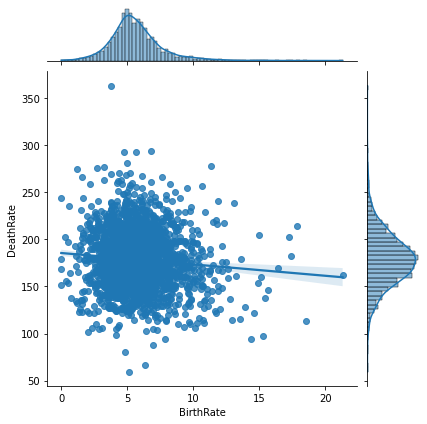

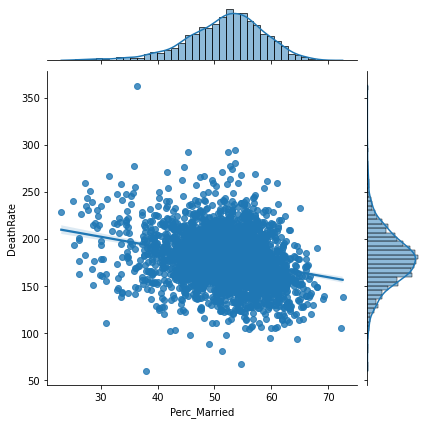

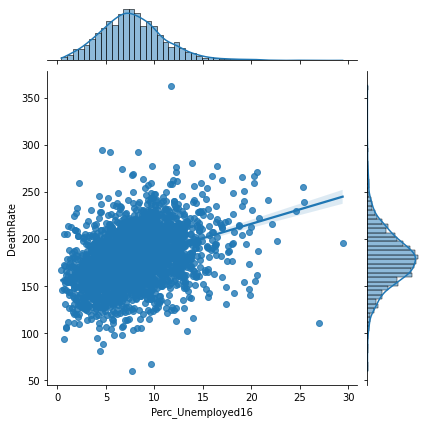

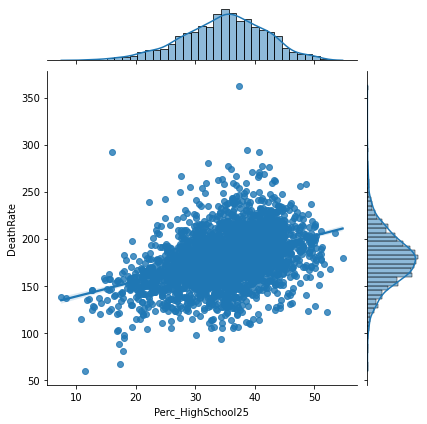

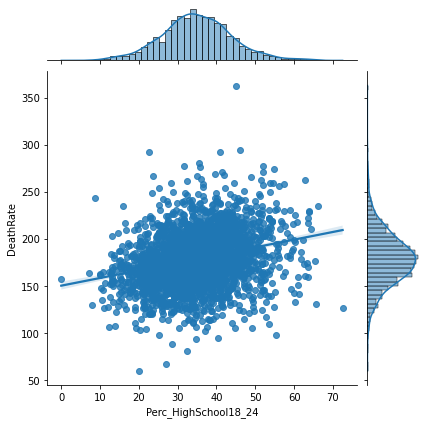

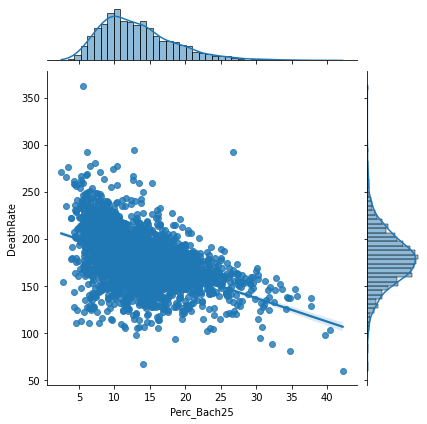

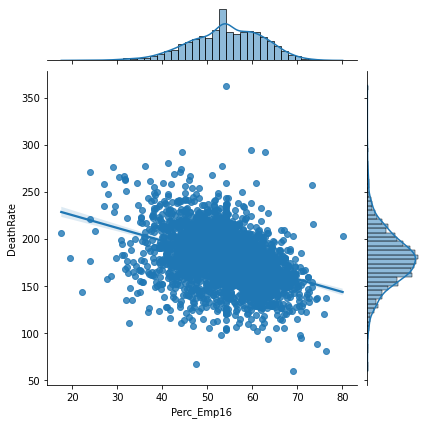

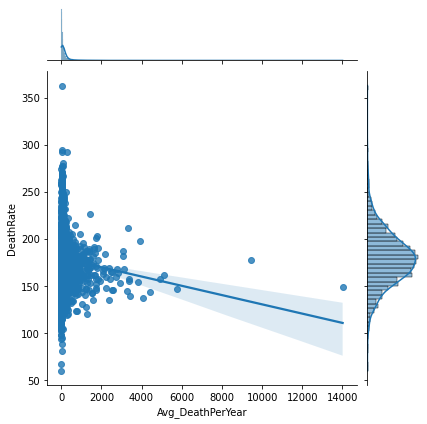

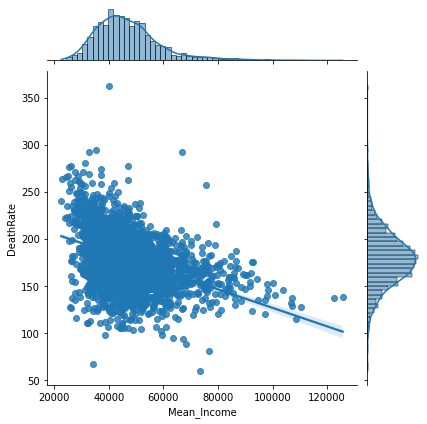

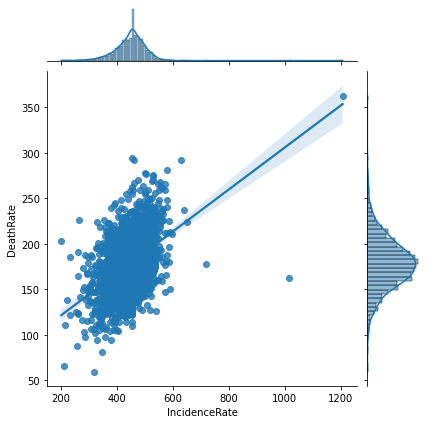

In [9]:
for cols in df.columns:
    sns.jointplot(data=df, x=cols, y='DeathRate', kind='reg')

In [10]:
df.corr('spearman')

DeathRate  Perc_Private  Perc_Poverty  \
DeathRate              1.000000     -0.408492      0.442266   
Perc_Private          -0.408492      1.000000     -0.828370   
Perc_Poverty           0.442266     -0.828370      1.000000   
Perc_MarriedHouse     -0.286118      0.409834     -0.571586   
Avg_Cases             -0.078130      0.265746     -0.193186   
Mean_Male             -0.002459      0.065187     -0.171629   
Mean_Female            0.024223      0.018259     -0.097368   
BirthRate             -0.053278     -0.049046     -0.020284   
Perc_Married          -0.261864      0.427683     -0.600609   
Perc_Unemployed16      0.402322     -0.623028      0.644372   
Perc_HighSchool25      0.422711     -0.220687      0.216892   
Perc_HighSchool18_24   0.278031     -0.273266      0.115623   
Perc_Bach25           -0.501796      0.642347     -0.590901   
Perc_Emp16            -0.418708      0.717264     -0.751606   
Avg_DeathPerYear       0.071632      0.111984     -0.040333   
Mean_Income           -0.463205      0.787402     -0.886101   
IncidenceRate          0.413254      0.082388      0.013192   

                      Perc_MarriedHouse  Avg_Cases  Mean_Male  Mean_Female  \
DeathRate                     -0.286118  -0.078130  -0.002459     0.024223   
Perc_Private                   0.409834   0.265746   0.065187     0.018259   
Perc_Poverty                  -0.571586  -0.193186  -0.171629    -0.097368   
Perc_MarriedHouse              1.000000  -0.118180   0.218622     0.144581   
Avg_Cases                     -0.118180   1.000000  -0.245287    -0.260144   
Mean_Male                      0.218622  -0.245287   1.000000     0.930137   
Mean_Female                    0.144581  -0.260144   0.930137     1.000000   
BirthRate                      0.103981  -0.071092  -0.132688    -0.122244   
Perc_Married                   0.853037  -0.172617   0.442630     0.356954   
Perc_Unemployed16             -0.433301   0.073001  -0.115518    -0.080677   
Perc_HighSchool25              0.048617  -0.349103   0.333203     0.344005   
Perc_HighSchool18_24           0.125014  -0.233498   0.249388     0.243519   
Perc_Bach25                    0.120641   0.393818  -0.113874    -0.154203   
Perc_Emp16                     0.313906   0.251614  -0.161174    -0.239712   
Avg_DeathPerYear              -0.211959   0.816474  -0.302113    -0.311812   
Mean_Income                    0.455139   0.341809  -0.091452    -0.164361   
IncidenceRate                 -0.145156   0.264754   0.007719     0.002609   

                      BirthRate  Perc_Married  Perc_Unemployed16  \
DeathRate             -0.053278     -0.261864           0.402322   
Perc_Private          -0.049046      0.427683          -0.623028   
Perc_Poverty          -0.020284     -0.600609           0.644372   
Perc_MarriedHouse      0.103981      0.853037          -0.433301   
Avg_Cases             -0.071092     -0.172617           0.073001   
Mean_Male             -0.132688      0.442630          -0.115518   
Mean_Female           -0.122244      0.356954          -0.080677   
BirthRate              1.000000      0.139206          -0.099835   
Perc_Married           0.139206      1.000000          -0.525753   
Perc_Unemployed16     -0.099835     -0.525753           1.000000   
Perc_HighSchool25      0.009713      0.087997           0.091599   
Perc_HighSchool18_24   0.065060      0.132159           0.137014   
Perc_Bach25           -0.080816      0.154117          -0.422731   
Perc_Emp16             0.084687      0.379158          -0.661131   
Avg_DeathPerYear      -0.152230     -0.317123           0.245565   
Mean_Income            0.011950      0.380798          -0.527398   
IncidenceRate         -0.109944     -0.116534           0.136984   

                      Perc_HighSchool25  Perc_HighSchool18_24  Perc_Bach25  \
DeathRate                      0.422711              0.278031    -0.501796   
Perc_Private                  -0.220687             -0.273266     0.642347   
Perc_Poverty           

Based on the joint plots and spearman correlation it seems that the most inlfuyent feature is percentage of residents of the commune 25 years of age or older who have obtained a bachelor's degree. I am not sure on why this could be so important (maybe is hidenly related to income) and average number of reported cancer death is not (even with a transformation later on)

## c) Evaluating data transformations

- based on above join plots it can be seen that there features Avg_DeathPerYear and Avg_Cases are somehow correlated to the Death rate variable but not in a linear way. Distibutions of these features are in some kind of a log distribution shape expect for the bump present near 8 but im gonna do a log transofrmation trying improve linearity and a more gaussian shape

In [11]:
df.columns

Index(['DeathRate', 'Perc_Private', 'Perc_Poverty', 'Perc_MarriedHouse',
       'Avg_Cases', 'Mean_Male', 'Mean_Female', 'BirthRate', 'Perc_Married',
       'Perc_Unemployed16', 'Perc_HighSchool25', 'Perc_HighSchool18_24',
       'Perc_Bach25', 'Perc_Emp16', 'Avg_DeathPerYear', 'Mean_Income',
       'IncidenceRate'],
      dtype='object')

In [12]:
df2 = df.copy()
df2 = df2[(df2['Perc_HighSchool18_24']!=0) & (df2['BirthRate']!=0)]
# df2['Avg_Cases'] = np.log(df2['Avg_Cases'])
# df2['Avg_DeathPerYear'] = np.log(df2['Avg_DeathPerYear'])
df2 = np.log(df2)

In [13]:
df2.corr('spearman')

DeathRate  Perc_Private  Perc_Poverty  \
DeathRate              1.000000     -0.408182      0.441895   
Perc_Private          -0.408182      1.000000     -0.828560   
Perc_Poverty           0.441895     -0.828560      1.000000   
Perc_MarriedHouse     -0.284905      0.409776     -0.571550   
Avg_Cases             -0.077993      0.264179     -0.192641   
Mean_Male             -0.001874      0.065606     -0.171602   
Mean_Female            0.025388      0.018562     -0.097200   
BirthRate             -0.053321     -0.050977     -0.019656   
Perc_Married          -0.260012      0.427800     -0.600800   
Perc_Unemployed16      0.402563     -0.623308      0.644681   
Perc_HighSchool25      0.422071     -0.221099      0.216508   
Perc_HighSchool18_24   0.278911     -0.272928      0.115812   
Perc_Bach25           -0.501079      0.642519     -0.590473   
Perc_Emp16            -0.418102      0.717068     -0.751365   
Avg_DeathPerYear       0.070947      0.111798     -0.040750   
Mean_Income           -0.463073      0.787472     -0.886148   
IncidenceRate          0.413430      0.081518      0.013238   

                      Perc_MarriedHouse  Avg_Cases  Mean_Male  Mean_Female  \
DeathRate                     -0.284905  -0.077993  -0.001874     0.025388   
Perc_Private                   0.409776   0.264179   0.065606     0.018562   
Perc_Poverty                  -0.571550  -0.192641  -0.171602    -0.097200   
Perc_MarriedHouse              1.000000  -0.118950   0.218464     0.143622   
Avg_Cases                     -0.118950   1.000000  -0.244084    -0.258822   
Mean_Male                      0.218464  -0.244084   1.000000     0.930078   
Mean_Female                    0.143622  -0.258822   0.930078     1.000000   
BirthRate                      0.104622  -0.075330  -0.130307    -0.119654   
Perc_Married                   0.852911  -0.172880   0.442633     0.355862   
Perc_Unemployed16             -0.434099   0.073256  -0.113784    -0.079335   
Perc_HighSchool25              0.050842  -0.350856   0.335233     0.346743   
Perc_HighSchool18_24           0.125212  -0.234108   0.251898     0.245596   
Perc_Bach25                    0.119022   0.394371  -0.115030    -0.155794   
Perc_Emp16                     0.313513   0.250601  -0.161299    -0.240058   
Avg_DeathPerYear              -0.211240   0.817461  -0.299546    -0.309175   
Mean_Income                    0.455007   0.340934  -0.091092    -0.164248   
IncidenceRate                 -0.144196   0.263801   0.008862     0.004352   

                      BirthRate  Perc_Married  Perc_Unemployed16  \
DeathRate             -0.053321     -0.260012           0.402563   
Perc_Private          -0.050977      0.427800          -0.623308   
Perc_Poverty          -0.019656     -0.600800           0.644681   
Perc_MarriedHouse      0.104622      0.852911          -0.434099   
Avg_Cases             -0.075330     -0.172880           0.073256   
Mean_Male             -0.130307      0.442633          -0.113784   
Mean_Female           -0.119654      0.355862          -0.079335   
BirthRate              1.000000      0.140890          -0.100684   
Perc_Married           0.140890      1.000000          -0.526533   
Perc_Unemployed16     -0.100684     -0.526533           1.000000   
Perc_HighSchool25      0.008677      0.090879           0.092098   
Perc_HighSchool18_24   0.064847      0.132649           0.135057   
Perc_Bach25           -0.081183      0.152181          -0.423040   
Perc_Emp16             0.083388      0.378852          -0.661811   
Avg_DeathPerYear      -0.156345     -0.316078           0.244562   
Mean_Income            0.010397      0.380873          -0.528286   
IncidenceRate         -0.112100     -0.115128           0.138103   

                      Perc_HighSchool25  Perc_HighSchool18_24  Perc_Bach25  \
DeathRate                      0.422071              0.278911    -0.501079   
Perc_Private                  -0.221099             -0.272928     0.642519   
Perc_Poverty           

<AxesSubplot:xlabel='Avg_Cases', ylabel='Count'>

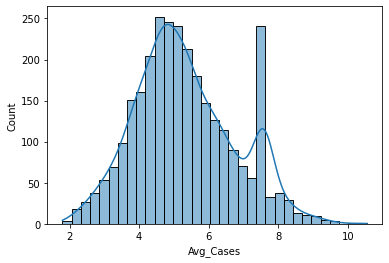

In [14]:
sns.histplot(data=df2['Avg_Cases'], kde=True)
# plt.xlim(0, 4000)
# sns.histplot(data=test['Avg_Cases'])

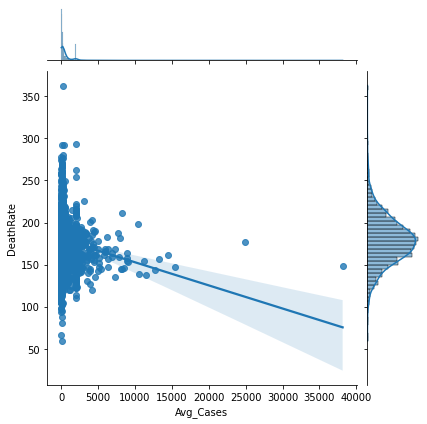

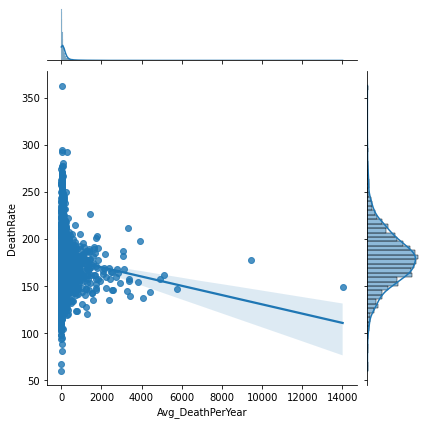

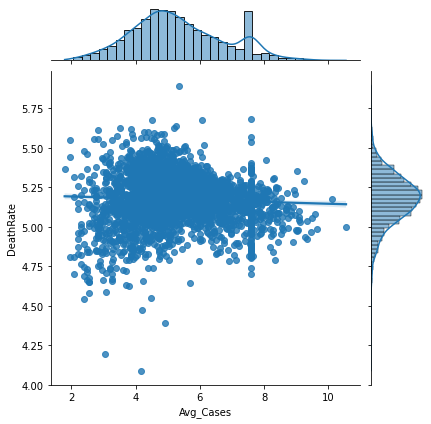

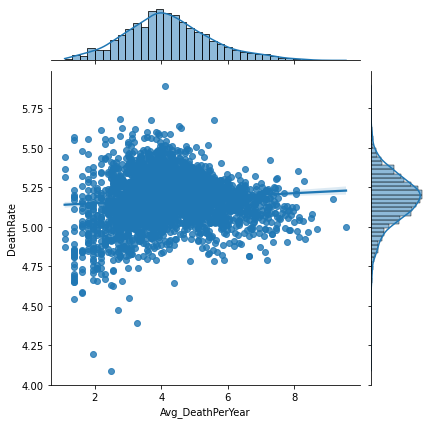

In [15]:
sns.jointplot(data=df, x='Avg_Cases', y='DeathRate', kind='reg')
sns.jointplot(data=df, x='Avg_DeathPerYear', y='DeathRate', kind='reg')
sns.jointplot(data=df2, x='Avg_Cases', y='DeathRate', kind='reg')
sns.jointplot(data=df2, x='Avg_DeathPerYear', y='DeathRate', kind='reg')

it can be seen huge improvement in linearity. they have also a strong linear relationship so probably one of them is gonna be droped later on

# Modeling

## a) Propossing models

In [16]:
X = df2.loc[:, df2.columns != 'DeathRate']
y = df2['DeathRate']

In [17]:
columns = []
for cols in X.columns:
    columns.append(cols)
print(columns)

['Perc_Private', 'Perc_Poverty', 'Perc_MarriedHouse', 'Avg_Cases', 'Mean_Male', 'Mean_Female', 'BirthRate', 'Perc_Married', 'Perc_Unemployed16', 'Perc_HighSchool25', 'Perc_HighSchool18_24', 'Perc_Bach25', 'Perc_Emp16', 'Avg_DeathPerYear', 'Mean_Income', 'IncidenceRate']


- identifying dependant and independant variables

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

- spliting data set into train and test

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

- scaling data so big and small values have proportional importance

In [20]:
X_train = pd.DataFrame(data=X_train, columns = columns)
X_test = pd.DataFrame(data=X_test, columns = columns)

In [21]:
y_train = y_train.reset_index(drop=True)

In [22]:
print(X_train.shape)
print(y_train.shape)

(2355, 16)
(2355,)


In [23]:
y_train

0       5.009301
1       5.187944
2       5.116795
3       5.196838
4       5.236974
          ...   
2350    5.358942
2351    5.342813
2352    5.238567
2353    5.389528
2354    5.335613
Name: DeathRate, Length: 2355, dtype: float64

### First Model

In [24]:
reg1 = sm.OLS(y_train, X_train).fit()
print(reg1.summary())

                                 OLS Regression Results                                
Dep. Variable:              DeathRate   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                            0.07197
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        1.00
Time:                        12:27:06   Log-Likelihood:                         -7211.8
No. Observations:                2355   AIC:                                  1.446e+04
Df Residuals:                    2339   BIC:                                  1.455e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### Second Model

- second regression model we add a constant column and see if our results improve or not

In [25]:
reg2 = sm.OLS(y_train, add_constant(X_train)).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathRate   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:27:06   Log-Likelihood:                 1876.9
No. Observations:                2355   AIC:                            -3720.
Df Residuals:                    2338   BIC:                            -3622.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.1716 

- looks like adding the constant was a good idea since inmprove AIC, F-statistic and prob (F-statistic). It also shows a good relevance with the target variable as P>|t| = 0

### Third Model

- i have removed features with P value > .5

In [26]:
X_train2 = X_train.drop(['Perc_Private', 'Perc_Poverty', 'Mean_Female'], axis=1, inplace=False)
reg3 = sm.OLS(y_train, add_constant(X_train2)).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathRate   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:27:06   Log-Likelihood:                 1876.5
No. Observations:                2355   AIC:                            -3725.
Df Residuals:                    2341   BIC:                            -3644.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.1716 

- Base on AIC value i will choose model 3, also a large F statistic value and prob (F-statistic) = 0 tell us null iphotesis is rejected so there is in fact some kind of linear relationship between features and the target variable. Besides the very small decreasing in AIC (lower fit in new data) and R2 (lower train data fit) the reason i have choose this model instead of the second one which is pretty similar is because F-statistic improvement as well as R-squear and adj. R squeart small relationship improvmeent.

In [27]:
X_test2 = X_test.drop(['Perc_Private', 'Perc_Poverty', 'Mean_Female'], axis=1, inplace=False)
linear_reg = LinearRegression()
linear_reg.fit(X_train2, y_train)

print(linear_reg.coef_)
print(linear_reg.intercept_)

[-0.0527003  -0.0329598  -0.02323802 -0.00475127  0.04311805  0.00698135
  0.02839076  0.01396185 -0.03472807 -0.01587622  0.044741   -0.01071199
  0.06223885]
5.171588963346768


- it is shown consistency in coeficients and interceptor between sklearn and statsmodel values

In [28]:
y_pred = linear_reg.predict(X_test2)

In [29]:
print(r2_score(y_test, y_pred))
print(max_error(y_test, y_pred))

0.5372386918585661
0.5316371147336127


## b) Study multicolinearity

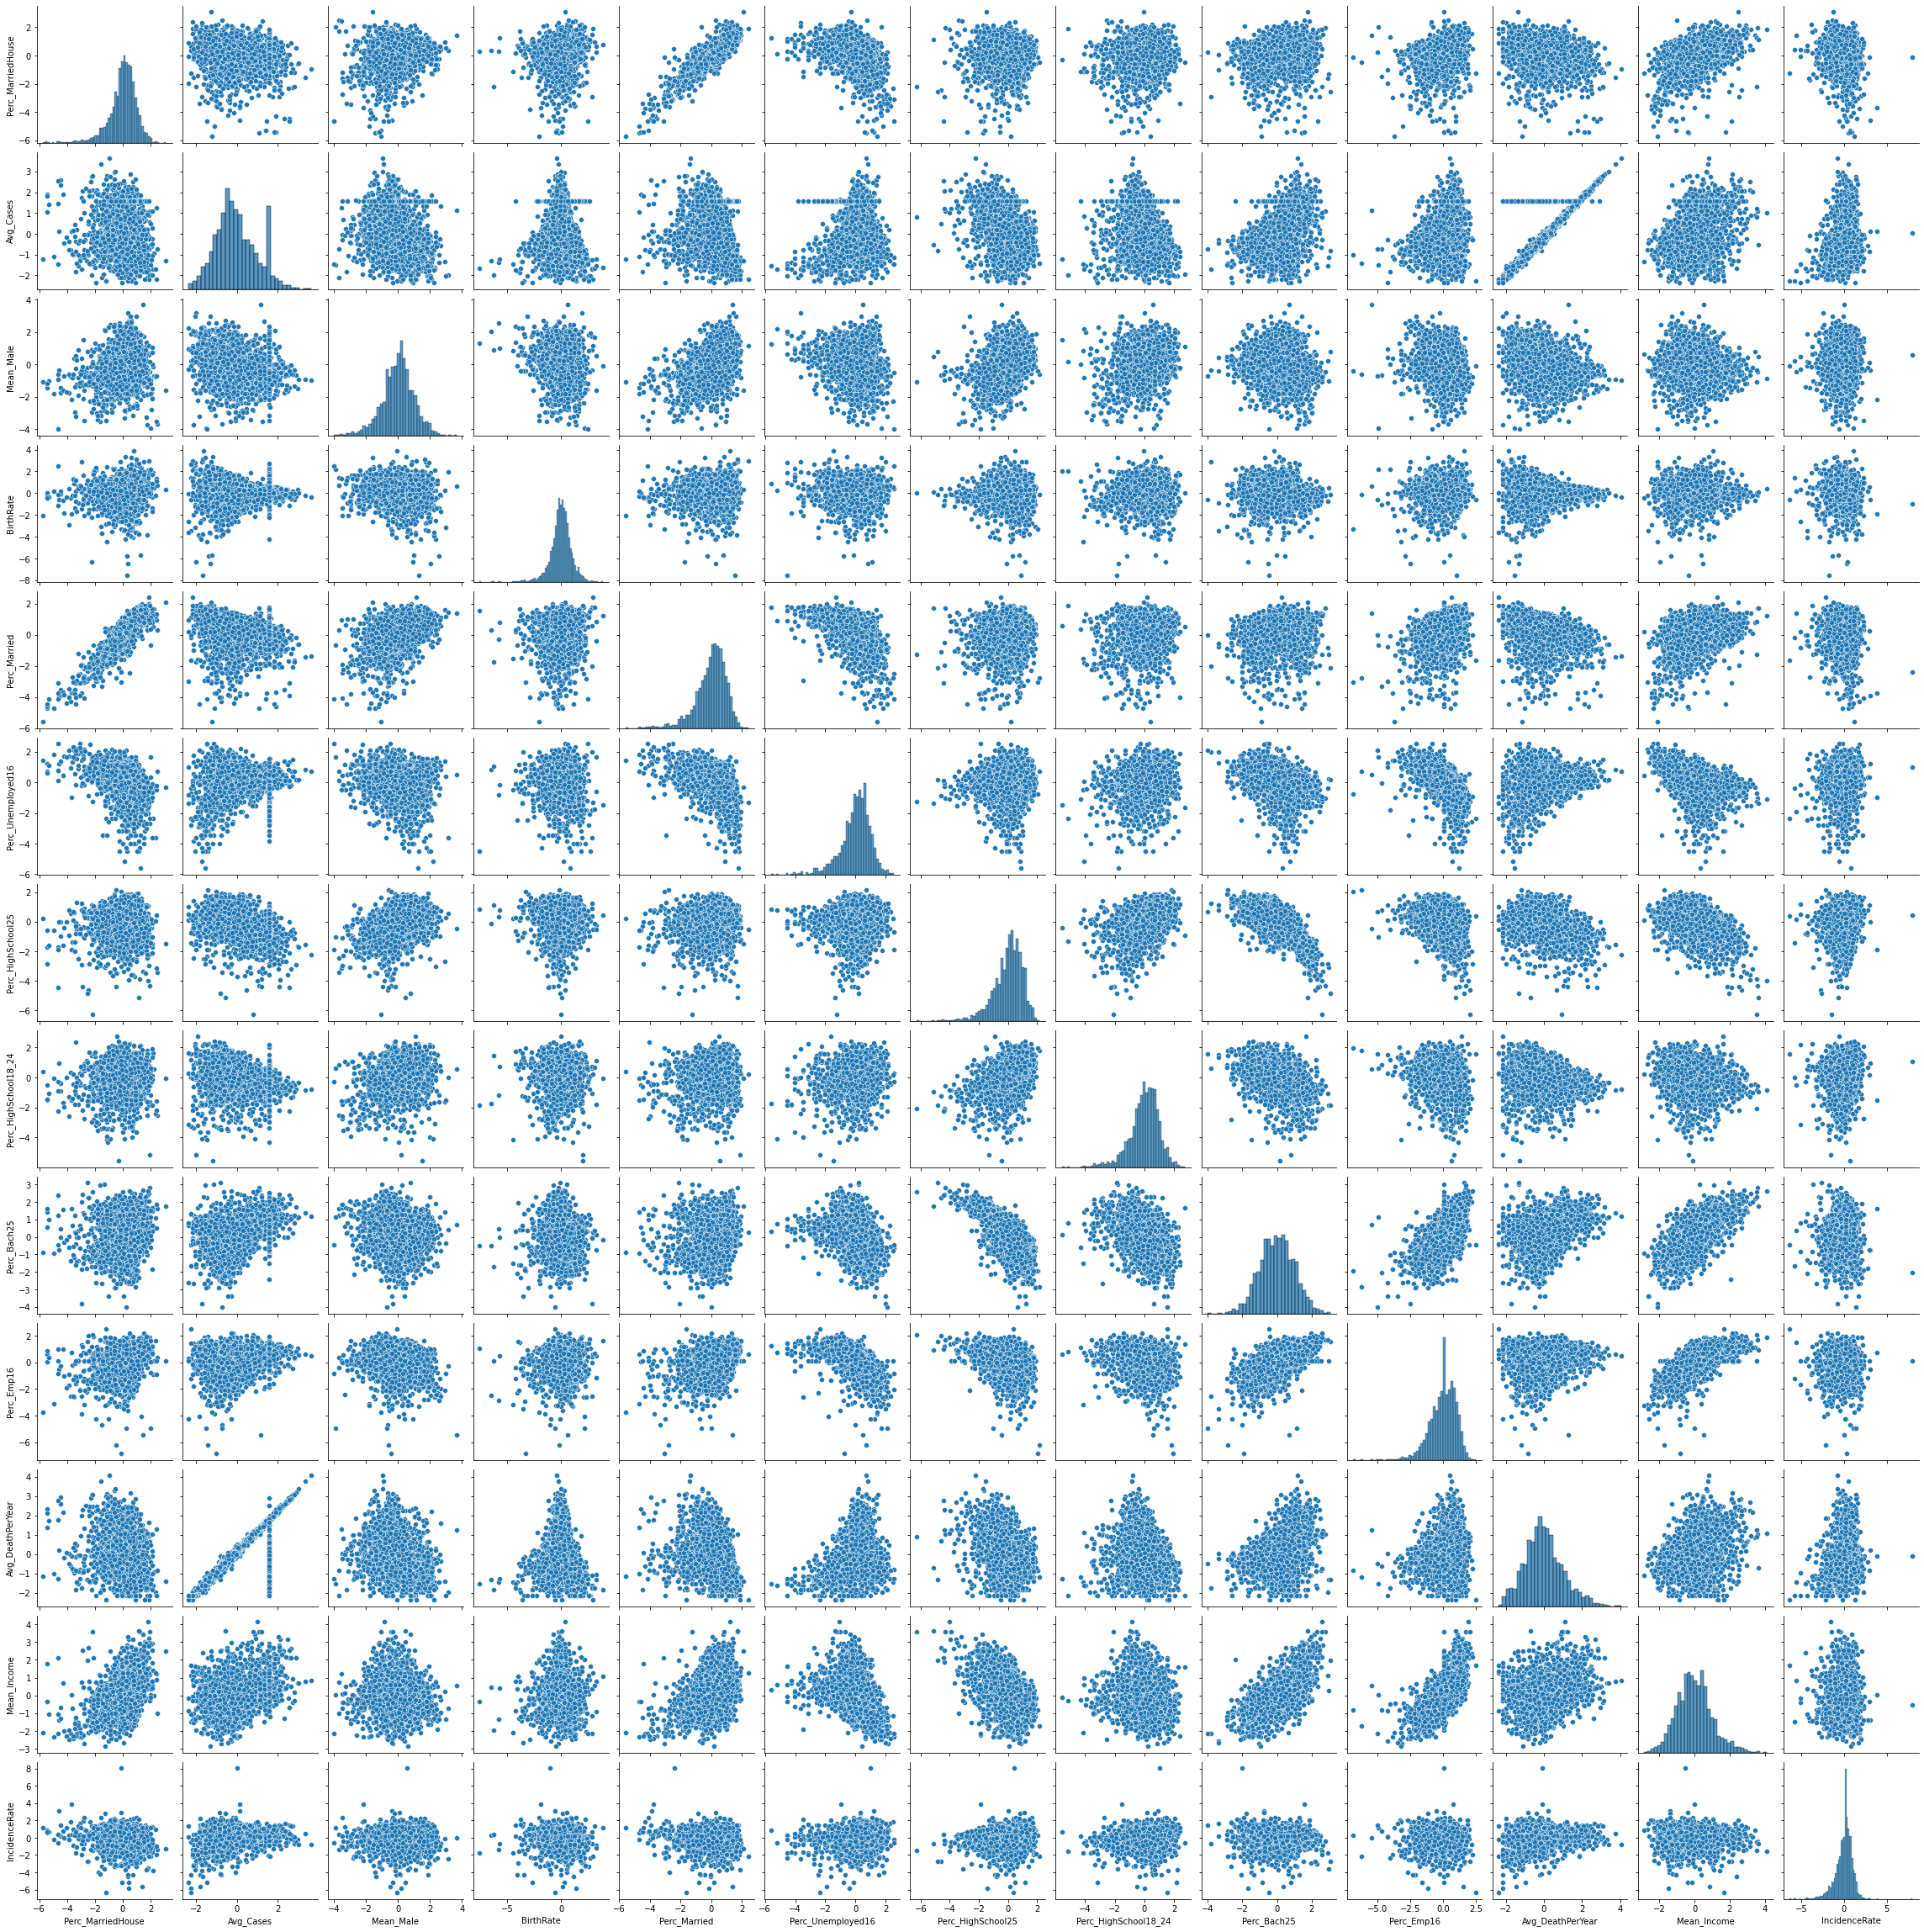

In [30]:
sns.pairplot(data=X_train2)

- pairplot alreadu shows multicolinearity situation between some variables.

In [31]:
X_train2.corr('spearman')

Perc_MarriedHouse  Avg_Cases  Mean_Male  BirthRate  \
Perc_MarriedHouse              1.000000  -0.131947   0.213716   0.105396   
Avg_Cases                     -0.131947   1.000000  -0.246161  -0.079293   
Mean_Male                      0.213716  -0.246161   1.000000  -0.139608   
BirthRate                      0.105396  -0.079293  -0.139608   1.000000   
Perc_Married                   0.852650  -0.177241   0.437383   0.142530   
Perc_Unemployed16             -0.430221   0.068436  -0.094572  -0.090562   
Perc_HighSchool25              0.045107  -0.356228   0.343368  -0.003840   
Perc_HighSchool18_24           0.122913  -0.235433   0.263528   0.054141   
Perc_Bach25                    0.117657   0.399565  -0.133895  -0.087193   
Perc_Emp16                     0.299730   0.249514  -0.185131   0.088621   
Avg_DeathPerYear              -0.222807   0.822303  -0.303888  -0.164482   
Mean_Income                    0.448412   0.330519  -0.107042   0.018699   
IncidenceRate                 -0.149482   0.266117   0.024170  -0.111690   

                      Perc_Married  Perc_Unemployed16  Perc_HighSchool25  \
Perc_MarriedHouse         0.852650          -0.430221           0.045107   
Avg_Cases                -0.177241           0.068436          -0.356228   
Mean_Male                 0.437383          -0.094572           0.343368   
BirthRate                 0.142530          -0.090562          -0.003840   
Perc_Married              1.000000          -0.525357           0.085686   
Perc_Unemployed16        -0.525357           1.000000           0.092641   
Perc_HighSchool25         0.085686           0.092641           1.000000   
Perc_HighSchool18_24      0.133598           0.137679           0.451169   
Perc_Bach25               0.144431          -0.423953          -0.694561   
Perc_Emp16                0.368331          -0.662087          -0.337069   
Avg_DeathPerYear         -0.325564           0.237488          -0.313026   
Mean_Income               0.376917          -0.533648          -0.395366   
IncidenceRate            -0.112411           0.125563           0.128098   

                      Perc_HighSchool18_24  Perc_Bach25  Perc_Emp16  \
Perc_MarriedHouse                 0.122913     0.117657    0.299730   
Avg_Cases                        -0.235433     0.399565    0.249514   
Mean_Male                         0.263528    -0.133895   -0.185131   
BirthRate                         0.054141    -0.087193    0.088621   
Perc_Married                      0.133598     0.144431    0.368331   
Perc_Unemployed16                 0.137679    -0.423953   -0.662087   
Perc_HighSchool25                 0.451169    -0.694561   -0.337069   
Perc_HighSchool18_24              1.000000    -0.421010   -0.286122   
Perc_Bach25                      -0.421010     1.000000    0.627977   
Perc_Emp16                       -0.286122     0.627977    1.000000   
Avg_DeathPerYear                 -0.172908     0.314751    0.092356   
Mean_Income                      -0.205292     0.684733    0.758155   
IncidenceRate                     0.018116    -0.018562   -0.003345   

                      Avg_DeathPerYear  Mean_Income  IncidenceRate  
Perc_MarriedHouse            -0.222807     0.448412      -0.149482  
Avg_Cases                     0.822303     0.330519       0.266117  
Mean_Male                    -0.303888    -0.107042       0.024170  
BirthRate                    -0.164482     0.018699      -0.111690  
Perc_Married                 -0.325564     0.376917      -0.112411  
Perc_Unemployed16             0.237488    -0.533648       0.125563  
Perc_HighSchool25            -0.313026    -0.395366       0.128098  
Perc_HighSchool18_24         -0.172908    -0.205292       0.018116  
Perc_Bach25                   0.314751     0.684733      -0.018562  
Perc_Emp16                    0.092356     0.758155      -0.003345  
Avg_DeathPerYear              1.000000     0.224758       0.247555  
Mean_Income                   0.224758     1.000000       0.012968  


In [32]:
df2.corr('spearman')

DeathRate  Perc_Private  Perc_Poverty  \
DeathRate              1.000000     -0.408182      0.441895   
Perc_Private          -0.408182      1.000000     -0.828560   
Perc_Poverty           0.441895     -0.828560      1.000000   
Perc_MarriedHouse     -0.284905      0.409776     -0.571550   
Avg_Cases             -0.077993      0.264179     -0.192641   
Mean_Male             -0.001874      0.065606     -0.171602   
Mean_Female            0.025388      0.018562     -0.097200   
BirthRate             -0.053321     -0.050977     -0.019656   
Perc_Married          -0.260012      0.427800     -0.600800   
Perc_Unemployed16      0.402563     -0.623308      0.644681   
Perc_HighSchool25      0.422071     -0.221099      0.216508   
Perc_HighSchool18_24   0.278911     -0.272928      0.115812   
Perc_Bach25           -0.501079      0.642519     -0.590473   
Perc_Emp16            -0.418102      0.717068     -0.751365   
Avg_DeathPerYear       0.070947      0.111798     -0.040750   
Mean_Income           -0.463073      0.787472     -0.886148   
IncidenceRate          0.413430      0.081518      0.013238   

                      Perc_MarriedHouse  Avg_Cases  Mean_Male  Mean_Female  \
DeathRate                     -0.284905  -0.077993  -0.001874     0.025388   
Perc_Private                   0.409776   0.264179   0.065606     0.018562   
Perc_Poverty                  -0.571550  -0.192641  -0.171602    -0.097200   
Perc_MarriedHouse              1.000000  -0.118950   0.218464     0.143622   
Avg_Cases                     -0.118950   1.000000  -0.244084    -0.258822   
Mean_Male                      0.218464  -0.244084   1.000000     0.930078   
Mean_Female                    0.143622  -0.258822   0.930078     1.000000   
BirthRate                      0.104622  -0.075330  -0.130307    -0.119654   
Perc_Married                   0.852911  -0.172880   0.442633     0.355862   
Perc_Unemployed16             -0.434099   0.073256  -0.113784    -0.079335   
Perc_HighSchool25              0.050842  -0.350856   0.335233     0.346743   
Perc_HighSchool18_24           0.125212  -0.234108   0.251898     0.245596   
Perc_Bach25                    0.119022   0.394371  -0.115030    -0.155794   
Perc_Emp16                     0.313513   0.250601  -0.161299    -0.240058   
Avg_DeathPerYear              -0.211240   0.817461  -0.299546    -0.309175   
Mean_Income                    0.455007   0.340934  -0.091092    -0.164248   
IncidenceRate                 -0.144196   0.263801   0.008862     0.004352   

                      BirthRate  Perc_Married  Perc_Unemployed16  \
DeathRate             -0.053321     -0.260012           0.402563   
Perc_Private          -0.050977      0.427800          -0.623308   
Perc_Poverty          -0.019656     -0.600800           0.644681   
Perc_MarriedHouse      0.104622      0.852911          -0.434099   
Avg_Cases             -0.075330     -0.172880           0.073256   
Mean_Male             -0.130307      0.442633          -0.113784   
Mean_Female           -0.119654      0.355862          -0.079335   
BirthRate              1.000000      0.140890          -0.100684   
Perc_Married           0.140890      1.000000          -0.526533   
Perc_Unemployed16     -0.100684     -0.526533           1.000000   
Perc_HighSchool25      0.008677      0.090879           0.092098   
Perc_HighSchool18_24   0.064847      0.132649           0.135057   
Perc_Bach25           -0.081183      0.152181          -0.423040   
Perc_Emp16             0.083388      0.378852          -0.661811   
Avg_DeathPerYear      -0.156345     -0.316078           0.244562   
Mean_Income            0.010397      0.380873          -0.528286   
IncidenceRate         -0.112100     -0.115128           0.138103   

                      Perc_HighSchool25  Perc_HighSchool18_24  Perc_Bach25  \
DeathRate                      0.422071              0.278911    -0.501079   
Perc_Private                  -0.221099             -0.272928     0.642519   
Perc_Poverty           

- I have perform a correlation matrix and drop some features which are >=.5. The exception in mean income was intended.

In [33]:
remove_cols = ['Perc_Married', 'Avg_DeathPerYear', 'Perc_Bach25', 'Perc_Emp16']

X_train3 = X_train2.drop(remove_cols, axis=1, inplace=False)

In [34]:
X_test3 = X_test2.drop(remove_cols, axis=1, inplace=False)

In [35]:
X_train3.corr('spearman')

Perc_MarriedHouse  Avg_Cases  Mean_Male  BirthRate  \
Perc_MarriedHouse              1.000000  -0.131947   0.213716   0.105396   
Avg_Cases                     -0.131947   1.000000  -0.246161  -0.079293   
Mean_Male                      0.213716  -0.246161   1.000000  -0.139608   
BirthRate                      0.105396  -0.079293  -0.139608   1.000000   
Perc_Unemployed16             -0.430221   0.068436  -0.094572  -0.090562   
Perc_HighSchool25              0.045107  -0.356228   0.343368  -0.003840   
Perc_HighSchool18_24           0.122913  -0.235433   0.263528   0.054141   
Mean_Income                    0.448412   0.330519  -0.107042   0.018699   
IncidenceRate                 -0.149482   0.266117   0.024170  -0.111690   

                      Perc_Unemployed16  Perc_HighSchool25  \
Perc_MarriedHouse             -0.430221           0.045107   
Avg_Cases                      0.068436          -0.356228   
Mean_Male                     -0.094572           0.343368   
BirthRate                     -0.090562          -0.003840   
Perc_Unemployed16              1.000000           0.092641   
Perc_HighSchool25              0.092641           1.000000   
Perc_HighSchool18_24           0.137679           0.451169   
Mean_Income                   -0.533648          -0.395366   
IncidenceRate                  0.125563           0.128098   

                      Perc_HighSchool18_24  Mean_Income  IncidenceRate  
Perc_MarriedHouse                 0.122913     0.448412      -0.149482  
Avg_Cases                        -0.235433     0.330519       0.266117  
Mean_Male                         0.263528    -0.107042       0.024170  
BirthRate                         0.054141     0.018699      -0.111690  
Perc_Unemployed16                 0.137679    -0.533648       0.125563  
Perc_HighSchool25                 0.451169    -0.395366       0.128098  
Perc_HighSchool18_24              1.000000    -0.205292       0.018116  
Mean_Income                      -0.205292     1.000000       0.012968  
IncidenceRate                     0.018116     0.012968       1.000000

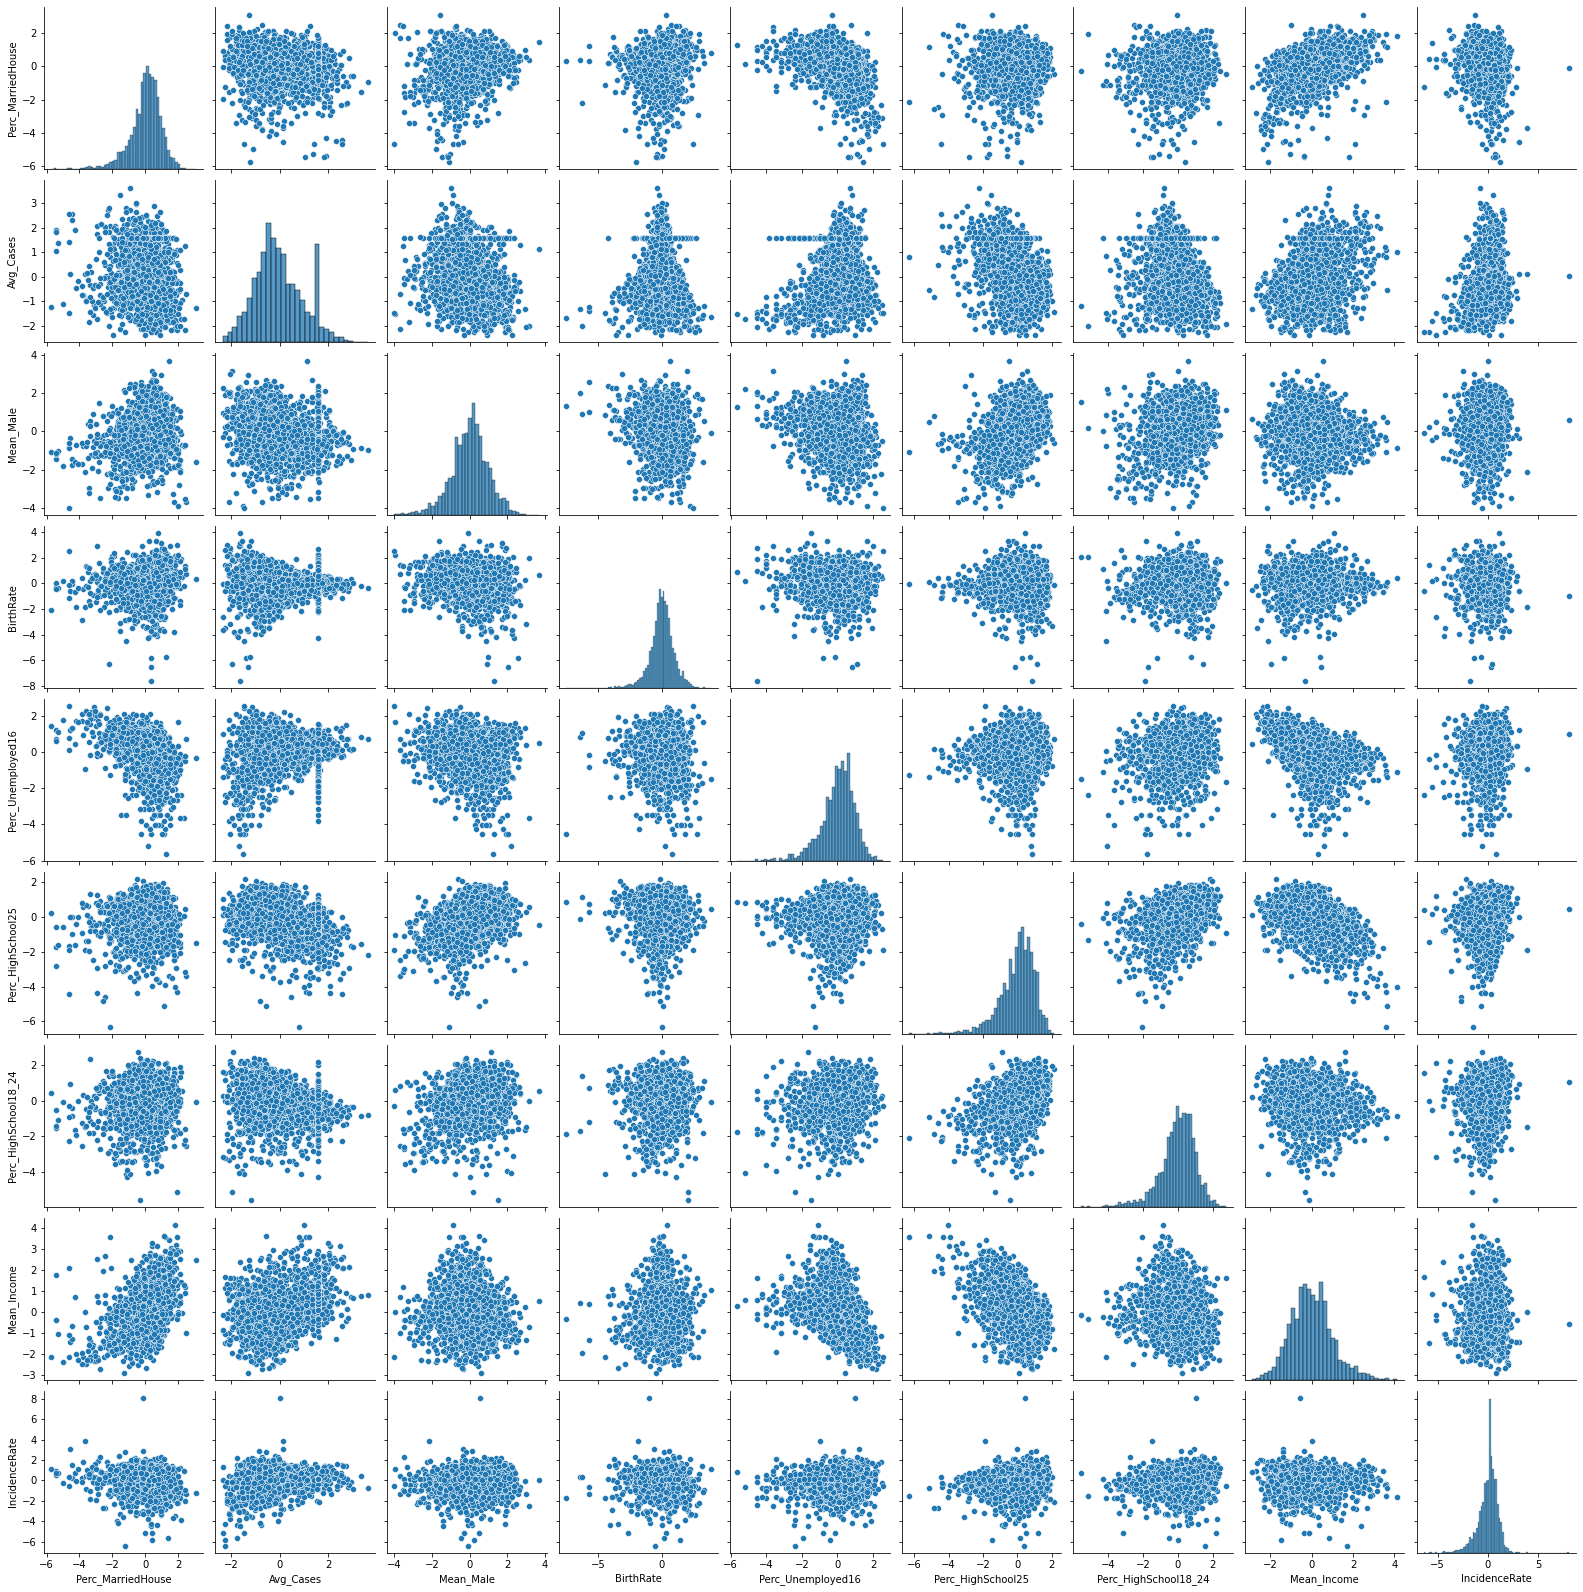

In [36]:
sns.pairplot(data=X_train3)

In [37]:
reg4 = sm.OLS(y_train, add_constant(X_train3)).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathRate   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     247.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:28:26   Log-Likelihood:                 1784.9
No. Observations:                2355   AIC:                            -3550.
Df Residuals:                    2345   BIC:                            -3492.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.1716 

- the model result is worse than before, i think this is because there is not yet been implemented an outlier analisis and since i based feature elimination mainly in spearman correlation this certainly will afect the result.

In [38]:
linear_reg2 = LinearRegression()
linear_reg2.fit(X_train3, y_train)

print(linear_reg2.coef_)
print(linear_reg2.intercept_)

y_pred2 = linear_reg2.predict(X_test3)

print(r2_score(y_test, y_pred2))
print(max_error(y_test, y_pred2))

[-0.01663124 -0.00549638 -0.01608759 -0.00380784  0.02269964  0.03905817
  0.02036671 -0.0294818   0.06335232]
5.171588963346769
0.5025594637586897
0.5287817172157556


## C) Outliers analysis

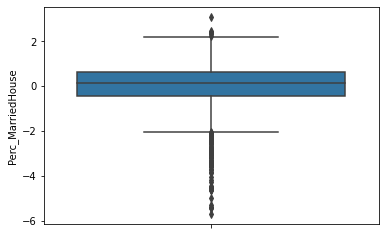

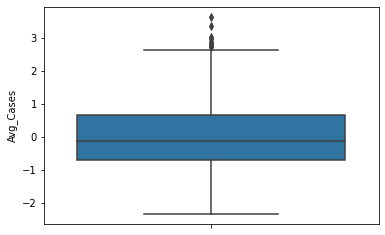

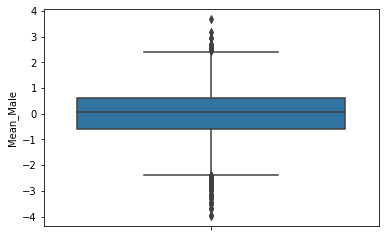

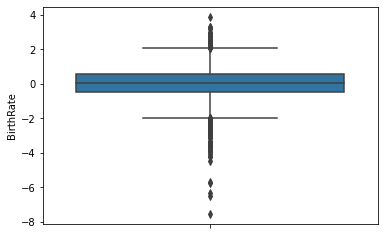

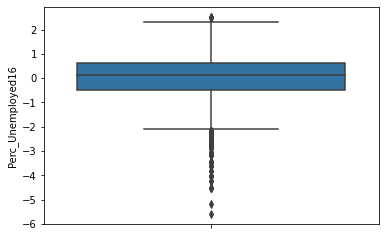

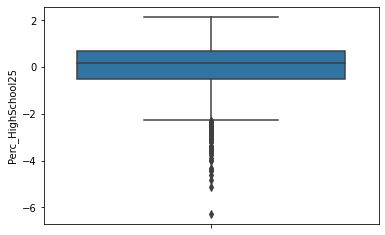

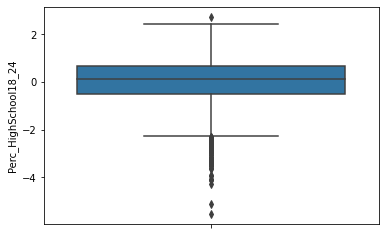

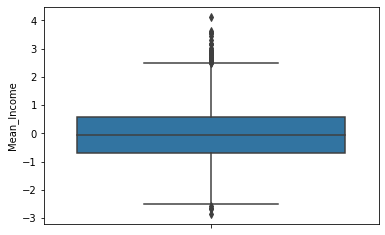

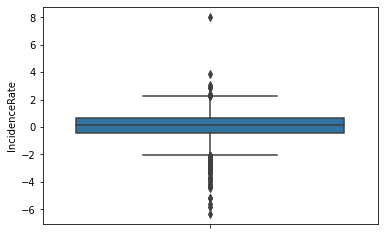

In [39]:
for i,col in zip(range(len(X_train3.columns)),X_train3.columns):
    plt.figure(i)
    sns.boxplot(y=col, data=X_train3)

- Is evident the presence of outliers, specially in feature IncidenceRate. There is evidence of possible outliers in other features but it needs a more close view

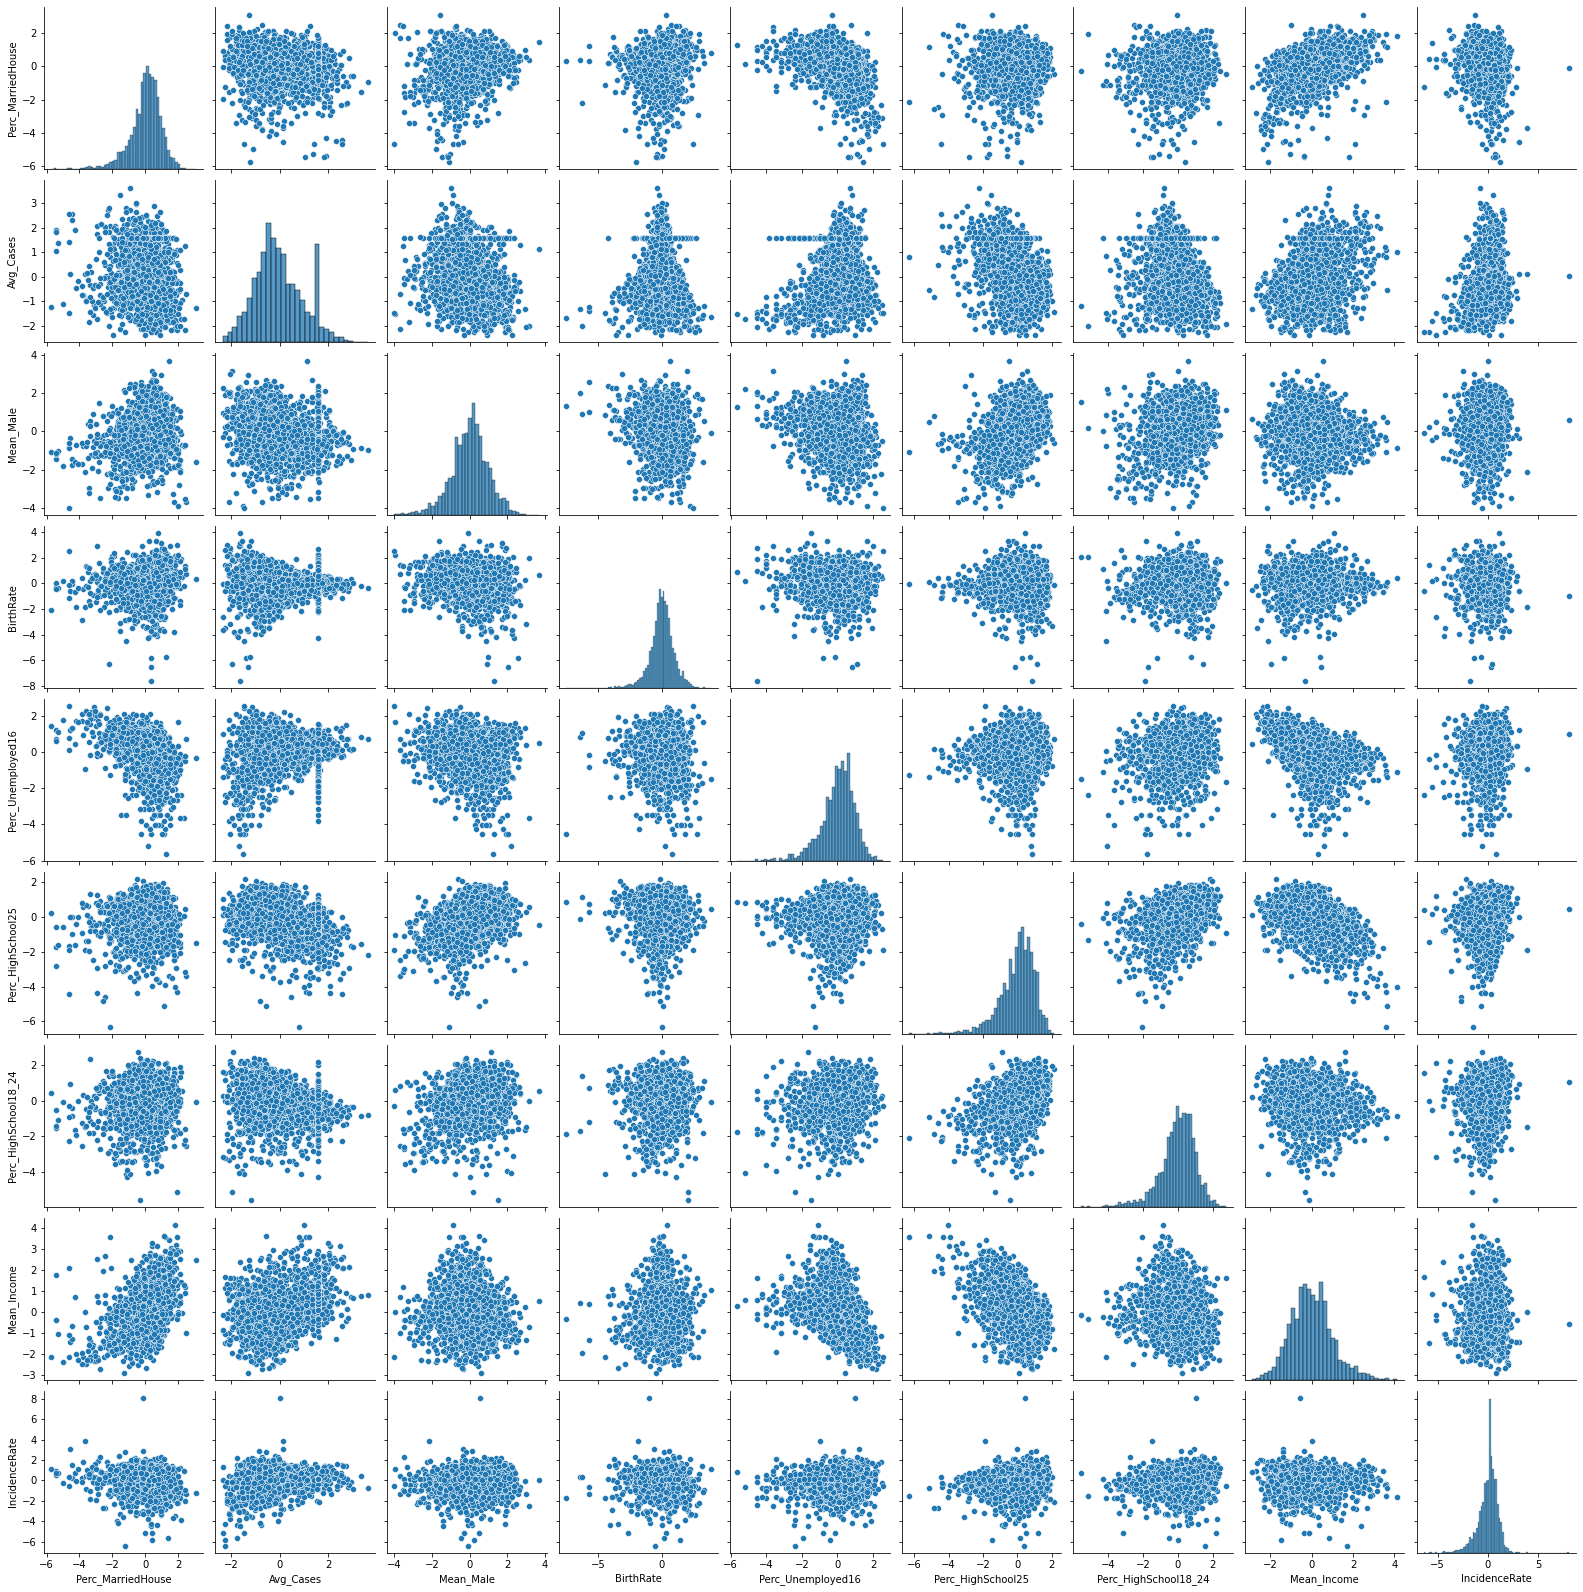

In [40]:
sns.pairplot(data=X_train3)

- pair plot confirm the presence of outliers in some features, but the amount of them does not make a good contrast wuth the amount represented in boxplots. I will assume not all possible outliers are indeed outliers, so with help of the pairplot and the boxplot i will choose them semi manually because i believe a lot of the outliers candidates from boxplots are actually part of the data distribution

In [41]:
X_train3.columns

Index(['Perc_MarriedHouse', 'Avg_Cases', 'Mean_Male', 'BirthRate',
       'Perc_Unemployed16', 'Perc_HighSchool25', 'Perc_HighSchool18_24',
       'Mean_Income', 'IncidenceRate'],
      dtype='object')

16
3
1
10
11
7
25
6
13


<AxesSubplot:>

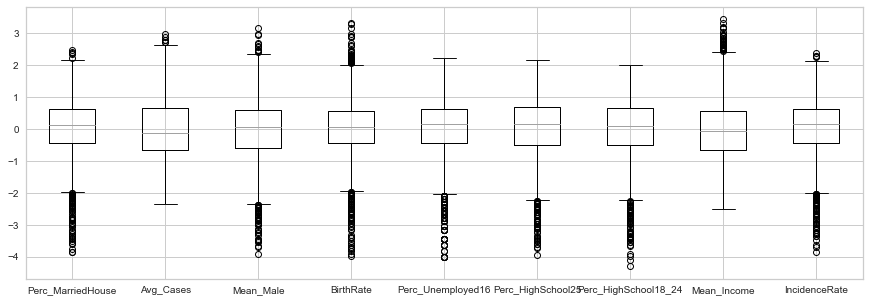

In [54]:
df_i  = X_train3.copy()
df_i['DeathRate'] = y_train
#-----------------------------------------#

print(len(df_i[(df_i['Perc_MarriedHouse']>3)| (df_i['Perc_MarriedHouse']<-4)]))
df_i = df_i[(df_i['Perc_MarriedHouse']<3) & (df_i['Perc_MarriedHouse']>-4)]

print(len(df_i[(df_i['Avg_Cases']>3)]))
df_i = df_i[(df_i['Avg_Cases']<3)]

print(len(df_i[(df_i['Mean_Male']>3.2)]))
df_i = df_i[(df_i['Mean_Male']<3.2)]

print(len(df_i[(df_i['BirthRate']>3.8) | (df_i['BirthRate']<-4)]))
df_i = df_i[(df_i['BirthRate']<3.8) & (df_i['BirthRate']>-4)]

print(len(df_i[(df_i['Perc_Unemployed16']>2.25) | (df_i['Perc_Unemployed16']<-4.2)]))
df_i = df_i[(df_i['Perc_Unemployed16']<2.25) & (df_i['Perc_Unemployed16']>-4.2)]

print(len(df_i[(df_i['Perc_HighSchool25']<-4.2)]))
df_i = df_i[(df_i['Perc_HighSchool25']>-4.2)]

print(len(df_i[(df_i['Perc_HighSchool18_24']>2) | (df_i['Perc_HighSchool18_24']<-4.5)]))
df_i = df_i[(df_i['Perc_HighSchool18_24']<2) & (df_i['Perc_HighSchool18_24']>-4.5)]

print(len(df_i[(df_i['Mean_Income']>3.5) | (df_i['Mean_Income']<-2.5)]))
df_i = df_i[(df_i['Mean_Income']<3.5) & (df_i['Mean_Income']>-2.5)]

print(len(df_i[(df_i['IncidenceRate']>2.4) | (df_i['IncidenceRate']<-4)]))
df_i = df_i[(df_i['IncidenceRate']<2.4) & (df_i['IncidenceRate']>-4)]

X_train4 = df_i.drop('DeathRate', axis=1, inplace=False)
y_train2 = df_i['DeathRate']

plt.figure(figsize=(15, 5))
X_train4.boxplot()

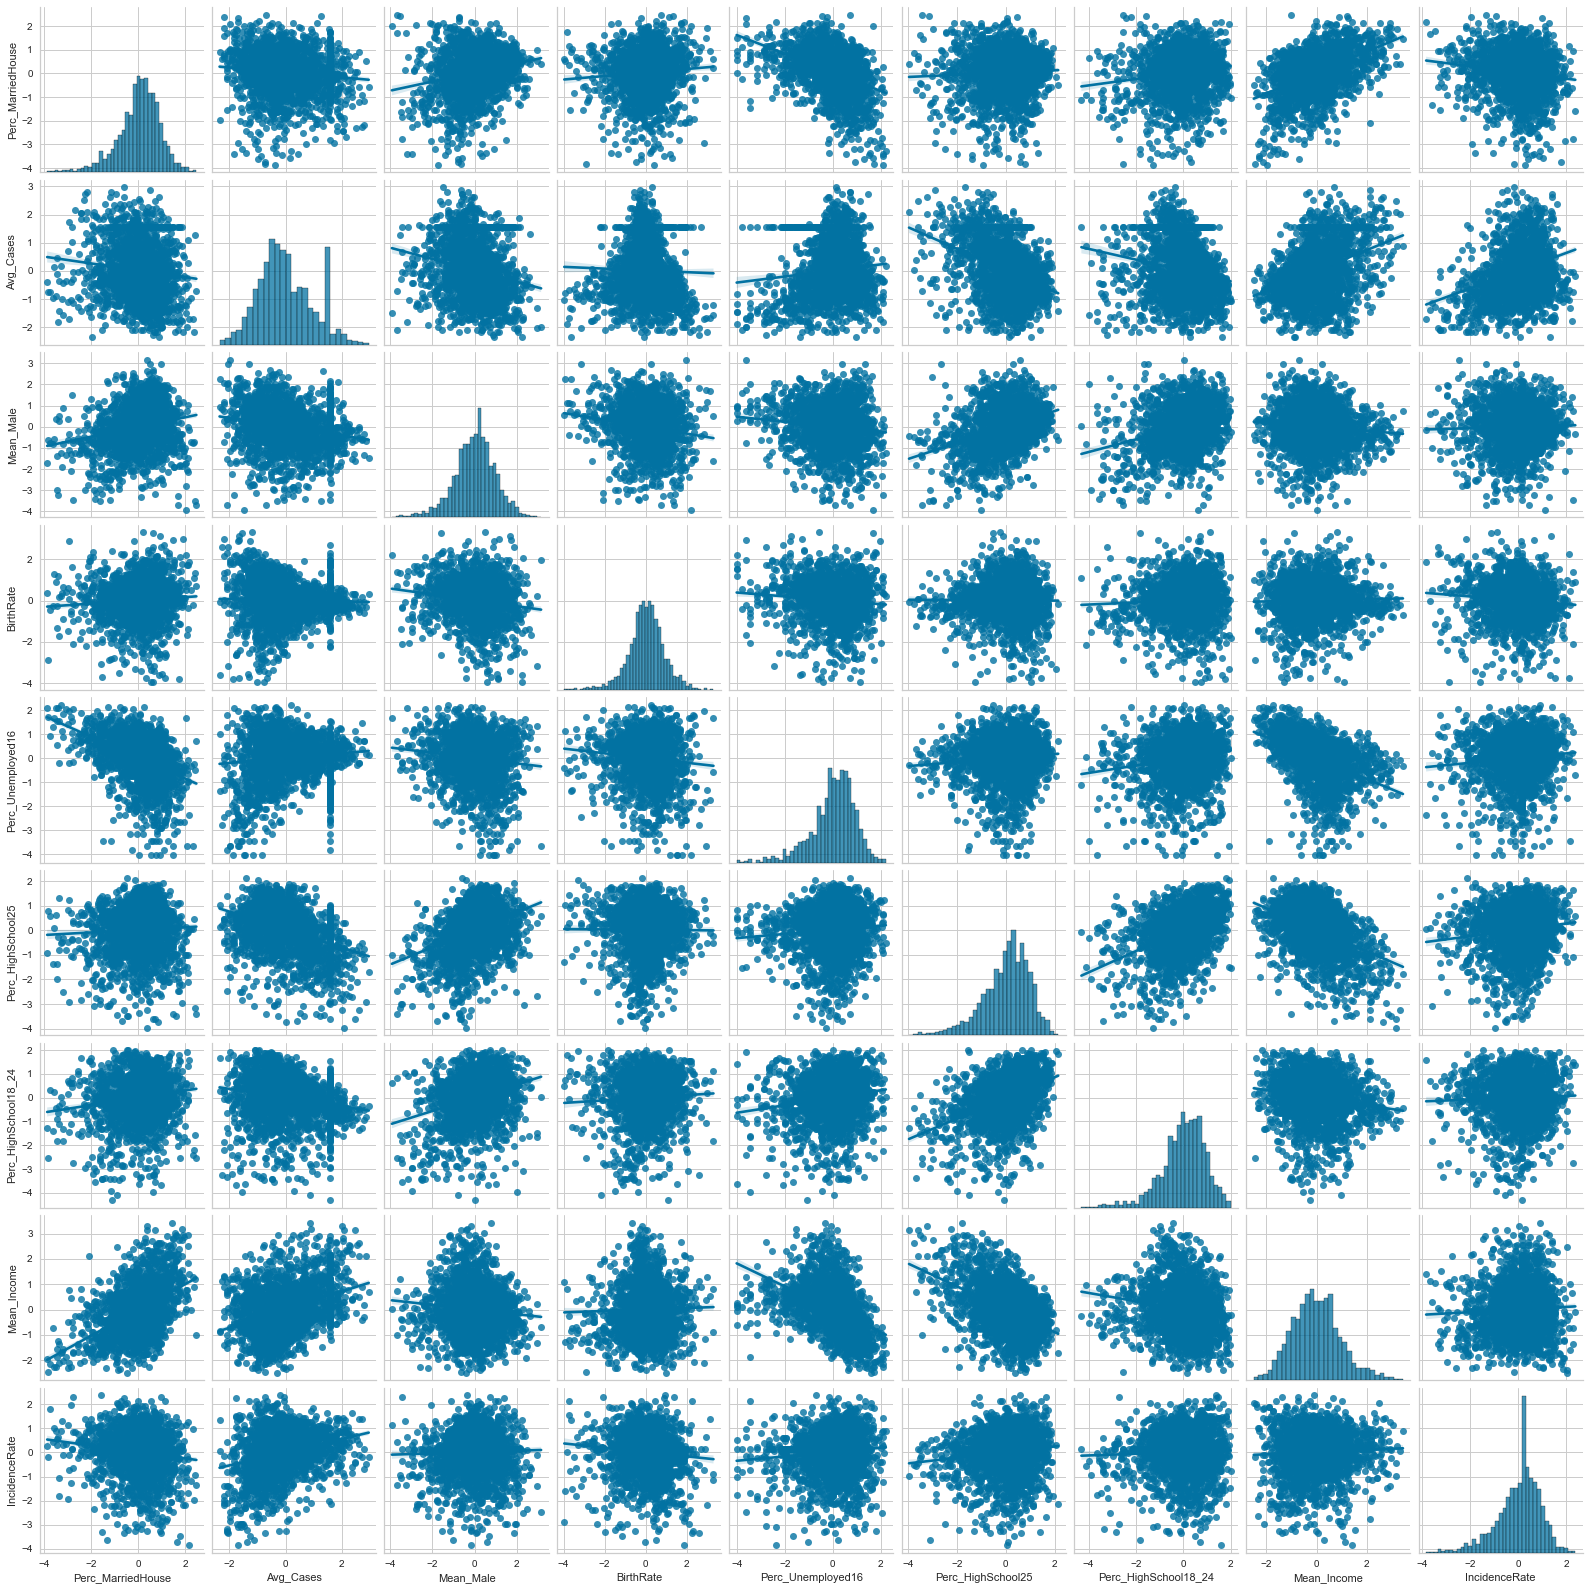

In [55]:
sns.pairplot(data=X_train4, kind='reg')

In [56]:
X_train4.corr('spearman')

Perc_MarriedHouse  Avg_Cases  Mean_Male  BirthRate  \
Perc_MarriedHouse              1.000000  -0.129753   0.201072   0.096876   
Avg_Cases                     -0.129753   1.000000  -0.239107  -0.075430   
Mean_Male                      0.201072  -0.239107   1.000000  -0.146616   
BirthRate                      0.096876  -0.075430  -0.146616   1.000000   
Perc_Unemployed16             -0.419433   0.051608  -0.077090  -0.086603   
Perc_HighSchool25              0.036019  -0.360621   0.340187  -0.009996   
Perc_HighSchool18_24           0.125214  -0.232701   0.259240   0.055696   
Mean_Income                    0.449751   0.338586  -0.113044   0.011554   
IncidenceRate                 -0.139972   0.269633   0.032909  -0.120322   

                      Perc_Unemployed16  Perc_HighSchool25  \
Perc_MarriedHouse             -0.419433           0.036019   
Avg_Cases                      0.051608          -0.360621   
Mean_Male                     -0.077090           0.340187   
BirthRate                     -0.086603          -0.009996   
Perc_Unemployed16              1.000000           0.096428   
Perc_HighSchool25              0.096428           1.000000   
Perc_HighSchool18_24           0.137404           0.445045   
Mean_Income                   -0.529153          -0.400867   
IncidenceRate                  0.105125           0.118727   

                      Perc_HighSchool18_24  Mean_Income  IncidenceRate  
Perc_MarriedHouse                 0.125214     0.449751      -0.139972  
Avg_Cases                        -0.232701     0.338586       0.269633  
Mean_Male                         0.259240    -0.113044       0.032909  
BirthRate                         0.055696     0.011554      -0.120322  
Perc_Unemployed16                 0.137404    -0.529153       0.105125  
Perc_HighSchool25                 0.445045    -0.400867       0.118727  
Perc_HighSchool18_24              1.000000    -0.197540       0.005224  
Mean_Income                      -0.197540     1.000000       0.034408  
IncidenceRate                     0.005224     0.034408       1.000000

In [57]:
X_train5 = X_train4 #.drop('BirthRate', axis=1, inplace=False)
reg5 = sm.OLS(y_train2, add_constant(X_train5)).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:              DeathRate   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     223.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          9.34e-305
Time:                        12:36:03   Log-Likelihood:                 1776.3
No. Observations:                2263   AIC:                            -3533.
Df Residuals:                    2253   BIC:                            -3475.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.1710 

- there wasn't an improvement on neither AIC or R2 (i.e. worse new and existing data fit)

In [58]:
linear_reg3 = LinearRegression()
linear_reg3.fit(X_train5, y_train2)

print(linear_reg3.coef_)
print(linear_reg3.intercept_)

X_test4 = X_test3 #.drop('BirthRate', axis=1, inplace=False)
y_pred3 = linear_reg3.predict(X_test4)

print(r2_score(y_test, y_pred3))
print(max_error(y_test, y_pred3))

[-0.01637052 -0.00645385 -0.01473883 -0.00286074  0.0255647   0.03782045
  0.02018564 -0.02861623  0.0674308 ]
5.170959746939125
0.5020291341852622
0.5313986995221525


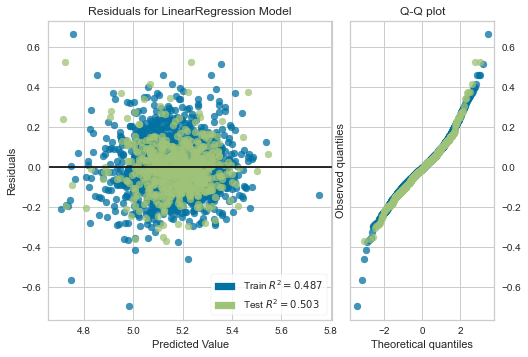

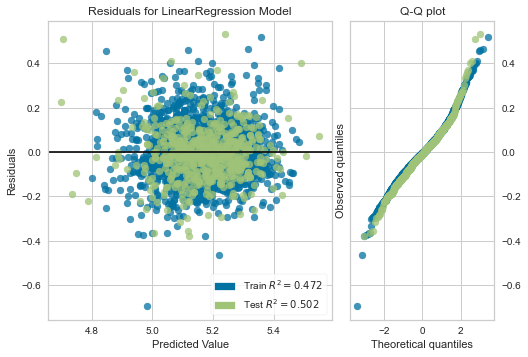

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [59]:
from yellowbrick.regressor import ResidualsPlot

# plt.figure(1)
# visualizer1 = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)

# visualizer1.fit(X_train2, y_train)
# visualizer1.score(X_test2, y_test)
# plt.title('model 4')
# visualizer1.show()


plt.figure(2)
visualizer2 = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)

visualizer2.fit(X_train3, y_train)
visualizer2.score(X_test3, y_test)
plt.title('model 4')
visualizer2.show()

plt.figure(3)
visualizer3 = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)

visualizer3.fit(X_train5, y_train2)
visualizer3.score(X_test4, y_test)
plt.title('model 5')
visualizer3.show()

- from the above plot we can see that the error is normaly distributed around 0 on both models and they have similar R2 values, but slightly worse the last one. residuals seems to distribute symmetrically around the center which is a good indicator. i believe if the outlier analysis would have been perfomed before the feature engereening we will may have better results since could improve linearity between target variable and independant variables helping make better desitions along the way.